In [1]:
import numpy
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
HI_Pipe3D_WISE = fits.open("WISE_Pipe3D_HI_new.fits", memmap=True)
HI_Pipe3D_WISE_table = Table(HI_Pipe3D_WISE[1].data)


In [3]:
MHI_log_initial = numpy.array(HI_Pipe3D_WISE_table['LOGMHI'])  # Stores all data of MHI log(Msun)
SM_log_initial = numpy.array(HI_Pipe3D_WISE_table['log_Mass'])    #SM = Stellar Mass    log(Msun)
W2_initial = numpy.array(HI_Pipe3D_WISE_table['W2'])  # Stores all data of W2
W3_initial = numpy.array(HI_Pipe3D_WISE_table['W3'])  # Stores all data of W3
Flagall = numpy.array(HI_Pipe3D_WISE_table['conflag'])   # All Flag data 
Plateifu_initial = numpy.array(HI_Pipe3D_WISE_table['plateifu_1'])
MHI_limit_initial = numpy.array(HI_Pipe3D_WISE_table['LOGHILIM200KMS'])     # upper limits for non-detections

detections = numpy.where((MHI_log_initial > 0) & (Flagall==0))
non_detections = numpy.where((MHI_limit_initial > 0) & (Flagall==0))

W2diffW3 = W2_initial - W3_initial


# Data for detections
MHI_log = MHI_log_initial[detections]                  # HI Mass log(Msun)
SM_log_detect = SM_log_initial[detections]                    # Steller Mass log(Msun)
W2diffW3_detect = W2diffW3[detections]
Plateifu_detect = Plateifu_initial[detections]

MF_log_detect = MHI_log - SM_log_detect                     # Mass Fraction     log(Msun) 

# print(len(W2diffW3_detect), len(MF_log_detect))           



# Data for non-detections
MHI_limit = MHI_limit_initial[non_detections]                  # HI Mass limit log(Msun)
SM_log_Ndetect = SM_log_initial[non_detections]                    # Steller Mass log(Msun)
W2diffW3_Ndetect = W2diffW3[non_detections]
Plateifu_Ndetect = Plateifu_initial[non_detections]

MF_log_Ndetect = MHI_limit - SM_log_Ndetect                     # Mass Fraction     log(Msun) 

print(len(MHI_limit[numpy.where(W2diffW3_Ndetect < 2.0)]))
print(len(MHI_log[numpy.where(W2diffW3_detect < 2.0)]))


1002
97


/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less
/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in less


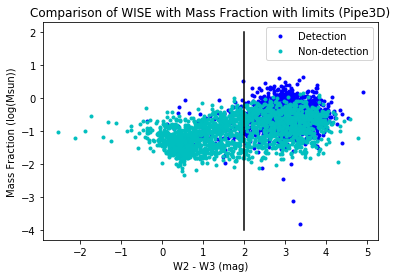

In [4]:
plt.xlabel("W2 - W3 (mag)")
plt.ylabel("Mass Fraction (log(Msun))")
plt.title("Comparison of WISE with Mass Fraction with limits (Pipe3D)")

plt.plot(W2diffW3_detect, MF_log_detect, "b.", label='Detection')
plt.plot(W2diffW3_Ndetect, MF_log_Ndetect, "c.", label='Non-detection')
plt.plot([2, 2], [-4, 2], "k-")

plt.legend()
plt.show()

In [5]:
sample = numpy.where(W2diffW3_detect < 2)
notsample = numpy.where(W2diffW3_Ndetect < 2)

print(sample)
print(notsample)

(array([  15,   19,   28,   61,  117,  121,  211,  281,  326,  373,  399,
        406,  449,  503,  535,  548,  549,  554,  560,  585,  602,  608,
        616,  618,  639,  653,  661,  669,  675,  676,  677,  683,  708,
        713,  715,  716,  719,  722,  737,  752,  758,  763,  771,  775,
        777,  782,  791,  797,  800,  804,  813,  819,  820,  849,  857,
        866,  869,  872,  877,  878,  881,  892,  894,  905,  918,  929,
        946,  952,  954,  958,  959,  967,  974,  993, 1006, 1033, 1043,
       1052, 1056, 1060, 1081, 1085, 1091, 1095, 1098, 1107, 1108, 1112,
       1118, 1129, 1137, 1150, 1163, 1168, 1172, 1173, 1175]),)
(array([   1,    5,   11, ..., 1989, 1991, 1992]),)


/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [9]:
MHI_sample = MHI_log[sample]
W2diffW3_sample = W2diffW3_detect[sample]
SM_sample = SM_log_detect[sample]
MF_sample = MF_log_detect[sample]
Plateifu_sample = [x.strip() for x in Plateifu_detect[sample]]  

MHI_notsample = MHI_limit[notsample]
W2diffW3_notsample = W2diffW3_Ndetect[notsample]
SM_notsample = SM_log_Ndetect[notsample]
MF_notsample = MF_log_Ndetect[notsample]
Plateifu_notsample = [x.strip() for x in Plateifu_Ndetect[notsample]]


required_index = []
temp_index = []
done_index = []

err = 0.0001

while len(required_index) <= 96:

    for index1, diff1 in enumerate(W2diffW3_sample):
        temp_index = []
        for index2, diff2 in enumerate(W2diffW3_notsample):
            if (diff2 < diff1 + err) and (diff2 > diff1 - err) and (SM_notsample[index2] < SM_sample[index1] + err) and \
            (SM_notsample[index2] > SM_sample[index1] - err) and index2 not in required_index and index1 not in done_index :
                required_index.append(index2)
                done_index.append(index1)
    err += 0.0001
    
print(required_index)
print(len(required_index))


[428, 879, 929, 175, 829, 354, 174, 513, 305, 206, 46, 1, 739, 738, 572, 418, 920, 809, 422, 715, 274, 893, 48, 214, 224, 770, 457, 832, 223, 54, 254, 493, 752, 173, 179, 3, 330, 624, 855, 268, 390, 44, 986, 388, 180, 848, 356, 327, 387, 546, 125, 99, 538, 994, 565, 637, 219, 349, 146, 603, 522, 469, 313, 988, 458, 263, 754, 33, 360, 136, 890, 243, 325, 642, 414, 212, 377, 351, 336, 897, 55, 371, 759, 184, 567, 975, 532, 396, 632, 7, 151, 702, 528, 983, 294, 304, 67]
97


In [12]:
# # 0.1 : 
# [233, 15, 54, 20, 85, 21, 3, 46, 14, 124, 16, 216, 135, 65, 63, 2, 222, 34, 99, 174, 522, 383, 28, 17, 196, 195, 288, 39, 314, 221, 364, 167, 396, 29, 192, 136, 274, 49, 228, 120, 264, 154, 368, 532, 284, 453, 246, 430, 243, 13, 141, 50, 412, 301, 428, 212, 1, 7, 294, 126, 305, 546, 484, 4, 66, 279, 319, 565, 607, 365, 277, 215, 254, 433, 219, 594, 313, 100, 422, 528, 371, 214, 355, 26, 217, 445, 379, 414, 346, 307, 8, 340, 259, 175, 387, 62, 67]

# # 0.01 :
# [929, 354, 879, 174, 829, 428, 513, 175, 418, 739, 223, 274, 920, 422, 738, 572, 206, 46, 832, 809, 224, 305, 457, 715, 1, 214, 770, 48, 893, 54, 44, 180, 173, 3, 538, 855, 99, 268, 192, 986, 330, 367, 179, 848, 356, 752, 388, 254, 546, 327, 565, 355, 125, 624, 387, 33, 249, 473, 140, 616, 522, 458, 469, 754, 136, 263, 360, 313, 988, 890, 219, 351, 637, 325, 336, 897, 243, 212, 377, 642, 414, 728, 52, 184, 396, 221, 532, 371, 567, 151, 7, 632, 528, 294, 983, 304, 67]

# # 0.001 :
# [929, 879, 428, 175, 829, 354, 174, 513, 206, 305, 739, 738, 572, 46, 1, 418, 920, 422, 809, 274, 224, 715, 214, 48, 893, 223, 832, 457, 770, 54, 254, 493, 752, 173, 3, 330, 179, 624, 44, 855, 268, 390, 986, 180, 388, 327, 848, 356, 99, 546, 125, 387, 538, 994, 565, 637, 219, 349, 146, 603, 522, 469, 313, 988, 458, 263, 754, 33, 360, 136, 890, 243, 325, 642, 212, 414, 377, 351, 336, 897, 759, 55, 371, 184, 567, 975, 532, 396, 632, 7, 151, 702, 528, 983, 294, 304, 67]

# # 0.0001
# [428, 879, 929, 175, 829, 354, 174, 513, 305, 206, 46, 1, 739, 738, 572, 418, 920, 809, 422, 715, 274, 893, 48, 214, 224, 770, 457, 832, 223, 54, 254, 493, 752, 173, 179, 3, 330, 624, 855, 268, 390, 44, 986, 388, 180, 848, 356, 327, 387, 546, 125, 99, 538, 994, 565, 637, 219, 349, 146, 603, 522, 469, 313, 988, 458, 263, 754, 33, 360, 136, 890, 243, 325, 642, 414, 212, 377, 351, 336, 897, 55, 371, 759, 184, 567, 975, 532, 396, 632, 7, 151, 702, 528, 983, 294, 304, 67]


control_index = [428, 879, 929, 175, 829, 354, 174, 513, 305, 206, 46, 1, 739, 738, 572, 418, 920, 809, 422, 715, 274, 893, 48, 214, 224, 770, 457, 832, 223, 54, 254, 493, 752, 173, 179, 3, 330, 624, 855, 268, 390, 44, 986, 388, 180, 848, 356, 327, 387, 546, 125, 99, 538, 994, 565, 637, 219, 349, 146, 603, 522, 469, 313, 988, 458, 263, 754, 33, 360, 136, 890, 243, 325, 642, 414, 212, 377, 351, 336, 897, 55, 371, 759, 184, 567, 975, 532, 396, 632, 7, 151, 702, 528, 983, 294, 304, 67]

W2diffW3_control = [W2diffW3_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]
SM_control = [SM_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]
Plateifu_control = [Plateifu_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]
MF_control = [MF_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]

# plt.xlabel("W2-W3")
# plt.ylabel("Frequency")
# plt.title("Histogram showing W2-W3 for Control II galaxies")
# plt.hist(W2diffW3_sample, bins='auto', alpha=0.4, label='Sample')
# plt.hist(W2diffW3_control, bins='auto', alpha=0.4, label='Control II', hatch='...', fc="white", ec="black")
# plt.legend()
# plt.show()

# plt.xlabel("Stellar Mass")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Stellar Mass for Control II galaxies")
# plt.hist(SM_sample, bins='auto', alpha=0.4, label='Sample')
# plt.hist(SM_control, bins='auto', alpha=0.4, label='Control II', hatch='...', fc="white", ec="black")
# plt.legend()
# plt.show()

# plt.xlabel("Mass Fraction")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Mass Fraction (limits) for Control II galaxies")
# plt.hist(MF_control, bins='auto', alpha=0.9, label='Control II')
# plt.legend()
# plt.show()

print(Plateifu_control)
print(len(Plateifu_control))


['10220-1902', '10503-6103', '7495-6103', '8156-1901', '8317-3704', '8322-1902', '8325-1902', '8449-1902', '8451-1901', '8553-3701', '8940-3702', '9049-1902', '9485-12704', '9509-1902', '9862-12704', '7992-3701', '8086-3701', '8243-3702', '8319-3702', '8329-1902', '8456-3704', '8940-3701', '8978-3704', '8980-6103', '9028-3702', '9490-3703', '9491-1901', '8154-12702', '10217-3704', '8140-1901', '8259-6102', '8450-12703', '8950-3702', '9037-3701', '9043-1901', '9507-9102', '10216-3704', '10217-6102', '10221-6104', '10504-3703', '10514-6104', '10516-3704', '10519-1901', '7443-12701', '7957-1901', '7975-6102', '7979-6102', '8077-3701', '8077-6101', '8078-6102', '8081-6102', '8139-9102', '8141-12705', '8141-6101', '8143-6104', '8158-3701', '8158-6102', '8249-6104', '8313-6101', '8330-9102', '8439-12702', '8443-3702', '8444-9101', '8448-6103', '8450-6104', '8484-6102', '8547-3703', '8550-6101', '8603-3704', '8615-3704', '8625-12701', '8626-12701', '8656-3702', '8940-6104', '8950-6103', '8984

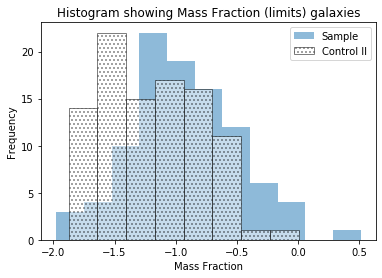

97


In [33]:
plt.xlabel("Mass Fraction")
plt.ylabel("Frequency")
plt.title("Histogram showing Mass Fraction (limits) galaxies")
plt.hist(MF_sample, bins='auto', alpha=0.5, label='Sample')
plt.hist(MF_control, bins='auto', alpha=0.5, label='Control II', hatch='...', fc="white", ec="black")
plt.legend()
plt.show()

print(len(MF_sample))